In [1]:
import lightkurve as lk
import numpy as np, matplotlib.pyplot as plt
%matplotlib inline

In [2]:
r = lk.search_lightcurve("TIC 254612758")
search_result = lk.search_targetpixelfile("TIC 254612758")
print(r)
print(search_result)


SearchResult containing 5 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 12 2019    QLP    1800   254612758      0.0
  1 TESS Sector 12 2019  CDIPS    1800   254612758      0.0
  2 TESS Sector 38 2021    QLP     600   254612758      0.0
  3 TESS Sector 65 2023   SPOC      20   254612758      0.0
  4 TESS Sector 65 2023   SPOC     120   254612758      0.0
SearchResult containing 2 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 65 2023   SPOC      20   254612758      0.0
  1 TESS Sector 65 2023   SPOC     120   254612758      0.0


In [3]:
lc0 = r[4].download()
tpf0 = search_result[1].download()

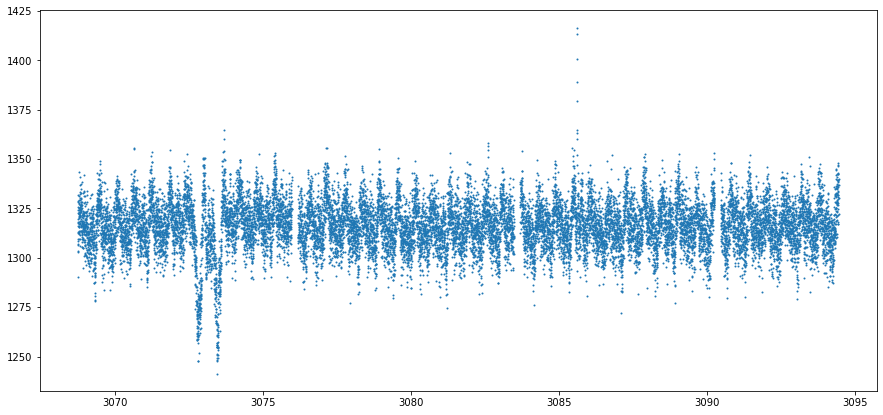

In [4]:
time = np.array(lc0.time.value)
flux = np.array(lc0.pdcsap_flux.value)
plt.figure(figsize=(15,7))
plt.scatter(time, flux, s=1);

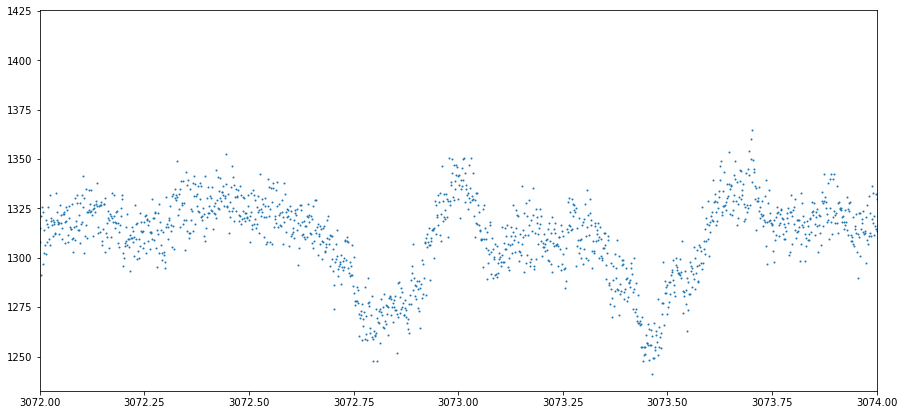

In [7]:
time = np.array(lc0.time.value)
flux = np.array(lc0.pdcsap_flux.value)
plt.figure(figsize=(15,7))
plt.scatter(time, flux, s=1)
plt.xlim([3072, 3074]);

lightkurve.Periodogram properties:
      Attribute         Description   Units
---------------------- -------------- -----
                nterms              1      
              targetid      254612758      
          default_view      frequency      
                 label  TIC 254612758      
             ls_method           fast      
frequency_at_max_power         1.6878 1 / d
             max_power      5578.7339   ppm
               nyquist       359.9935 1 / d
   period_at_max_power         0.5925     d
             frequency array (46284,) 1 / d
                period array (46284,)     d
                 power array (46284,)   ppm
                  meta <class 'dict'>      


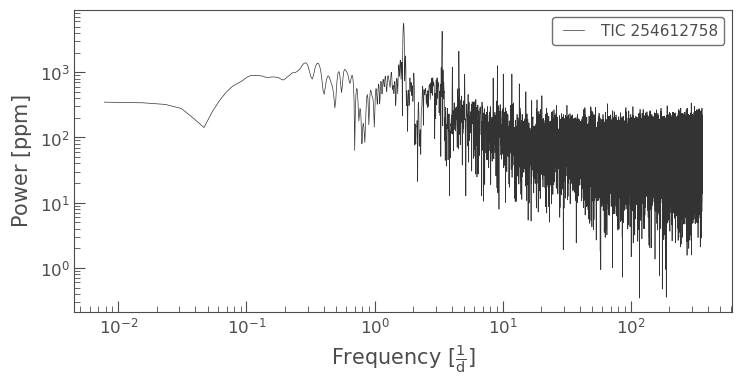

In [11]:
pg = lc0.normalize(unit='ppm').to_periodogram()
pg.plot(scale='log');
pg.show_properties()

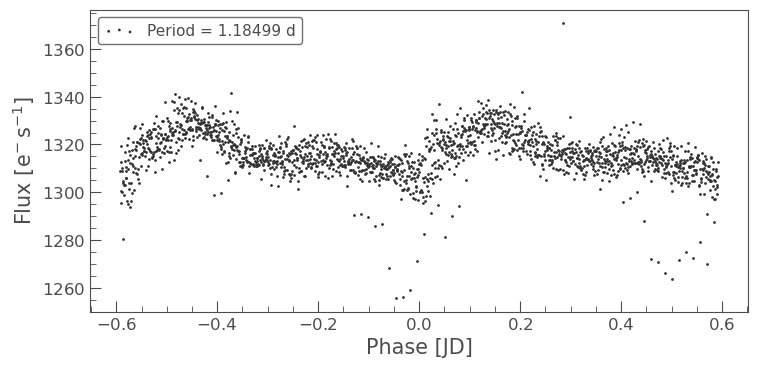

In [19]:
period = 2*pg.period_at_max_power
from astropy import units as u
lc0.bin(time_bin_size=20*u.minute).fold(period).scatter(label=f'Period = {period.value:.5f} d');

In [5]:
tpf0.interact()

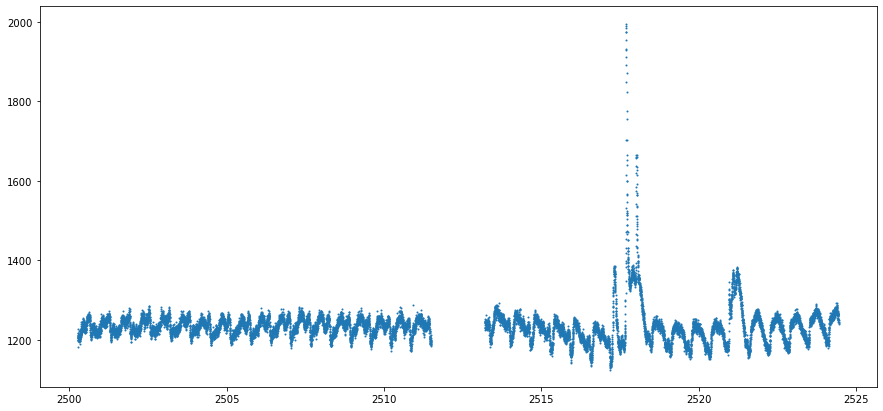

In [5]:
time = np.array(lc1.time.value)
flux = np.array(lc1.pdcsap_flux.value)
plt.figure(figsize=(15,7))
plt.scatter(time, flux, s=1);

In [6]:
tpf1.interact()